In [1]:
import pandas as pd
import numpy as np

In [3]:
# reading the dataset
heart_disease = pd.read_csv("diabetes.csv")
heart_disease.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
# getting the info of data
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# since there is no NaN value and all the columns have same entries we will proceed further

In [24]:
# creating the list of the features name
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age']

# spliting the features and the target
x = heart_disease.drop("Outcome", axis = 1)
y = heart_disease["Outcome"]

In [25]:
x.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [26]:
#now we have the data we have to build the Decision Tree Classifier

In [27]:
# importing the Libraries

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#spliting the data into the training and the testing dataset
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2)

clf = DecisionTreeClassifier(criterion="entropy" , max_depth = 5)

clf = clf.fit(x_train , y_train)

y_pred = clf.predict(x_test)

In [46]:
y_pred

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [47]:
# lets see the decision tree look likes

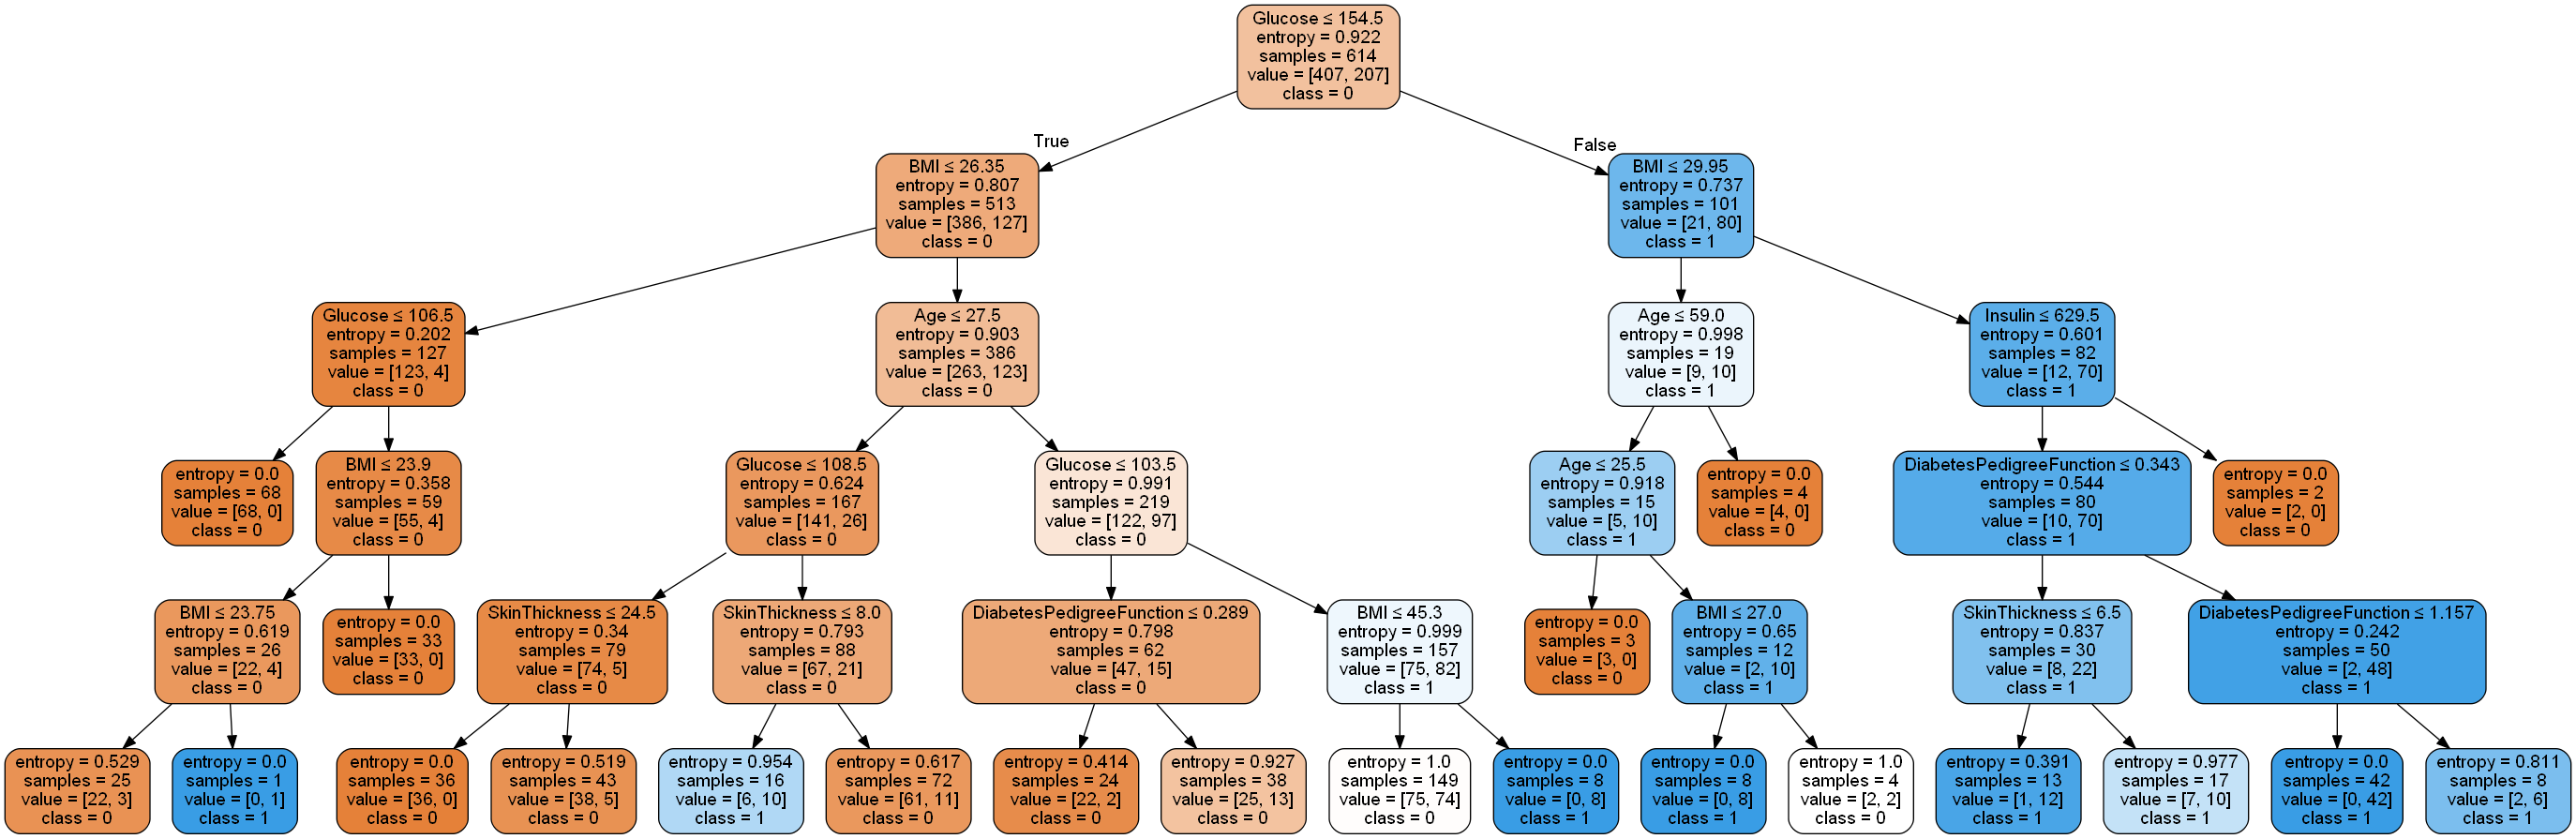

In [48]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from six import StringIO

dot_data = StringIO()
export_graphviz(clf , out_file=dot_data , rounded =True , filled = True ,special_characters=True,
               feature_names=features , class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("diabetes.png")
Image(graph.create_png())

In [49]:
# lets calculate the accuracy score
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test , y_pred)
print("The Accuracy we achieved using Max_depth=5 is : ",accuracy)

The Accuracy we achieved using Max_depth=5 is :  0.7077922077922078


In [55]:

clf = DecisionTreeClassifier(criterion="entropy" , max_depth = 4)

clf = clf.fit(x_train , y_train)

y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test , y_pred)
print("The Accuracy we achieved using Max_depth=3 is : ",accuracy)

The Accuracy we achieved using Max_depth=3 is :  0.7337662337662337


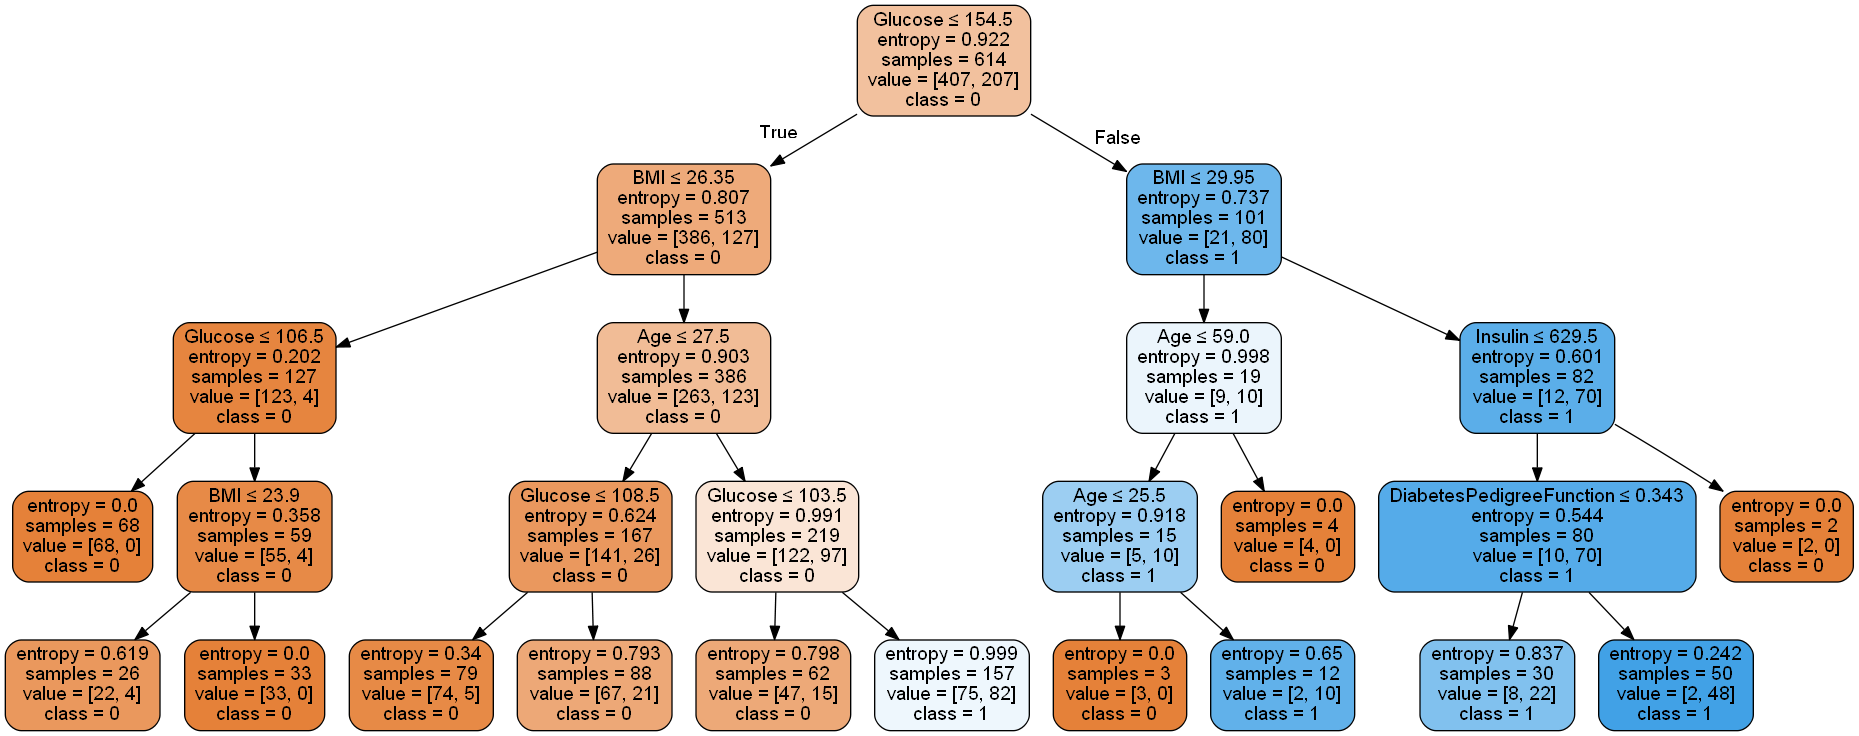

In [56]:
dot_data = StringIO()
export_graphviz(clf , out_file=dot_data , rounded =True , filled = True ,special_characters=True,
               feature_names=features , class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("diabetes.png")
Image(graph.create_png())